In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
def dataSummarize(data):
    """This function summarise the dataset info, including numerical or categorical features
       checking duplicate record and missing values
    """
    
    # Seperate Numerical and Categorical value
    numerical = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical = data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Check Anomolies, duplicate and missing values
    duplicate_num = data.duplicated().sum()
    duplicate_index = data[data.duplicated(keep=False)].index.tolist()
    
    missing = data.isna().sum()
    
    print(f"""
--------- Summarize --------------
Numerical features: {numerical}
Categorical features: {categorical}

--------- Duplicate --------------
How many duplicate records: {duplicate_num}
Where is the duplicate record occur: {duplicate_index}

--------- Missing ----------------
{missing}

""")
    return (numerical, categorical, duplicate_index)



In [111]:
data = pd.read_csv("letter-recognition.data", sep=',')

In [112]:
data.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [96]:
data.shape

(19999, 17)

In [113]:
data.columns = ['letter', 'x-box_horizontal', 'y-box_vertical', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

In [98]:
data.head()

,letter,x-box_horizontal,y-box_vertical,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   letter            19999 non-null  object
 1   x-box_horizontal  19999 non-null  int64 
 2   y-box_vertical    19999 non-null  int64 
 3   width             19999 non-null  int64 
 4   height            19999 non-null  int64 
 5   onpix             19999 non-null  int64 
 6   x-bar             19999 non-null  int64 
 7   y-bar             19999 non-null  int64 
 8   x2bar             19999 non-null  int64 
 9   y2bar             19999 non-null  int64 
 10  xybar             19999 non-null  int64 
 11  x2ybr             19999 non-null  int64 
 12  xy2br             19999 non-null  int64 
 13  x-ege             19999 non-null  int64 
 14  xegvy             19999 non-null  int64 
 15  y-ege             19999 non-null  int64 
 16  yegvx             19999 non-null  int64 
dtypes: int64(16)

In [100]:
numerical, categorical, duplicate_index = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['x-box_horizontal', 'y-box_vertical', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
Categorical features: ['letter']

--------- Duplicate --------------
How many duplicate records: 1332
Where is the duplicate record occur: [21, 36, 50, 59, 66, 76, 97, 102, 110, 119, 128, 132, 136, 140, 142, 174, 188, 202, 220, 221, 259, 265, 272, 277, 291, 304, 309, 312, 314, 319, 322, 350, 355, 360, 397, 412, 416, 435, 442, 449, 451, 462, 473, 486, 490, 495, 497, 500, 502, 531, 537, 541, 545, 552, 554, 563, 572, 583, 589, 594, 603, 604, 617, 626, 632, 637, 640, 655, 665, 667, 672, 678, 693, 699, 709, 710, 712, 714, 717, 720, 721, 723, 724, 729, 742, 753, 770, 772, 786, 791, 800, 815, 826, 830, 837, 839, 840, 841, 842, 845, 846, 848, 862, 863, 869, 874, 876, 877, 896, 901, 906, 908, 909, 928, 940, 942, 948, 970, 997, 1006, 1007, 1010, 1031, 1035, 1049, 1053, 1066, 10

In [101]:
data.drop_duplicates(inplace=True)

In [102]:
numerical, categorical, duplicate_index = dataSummarize(data)


--------- Summarize --------------
Numerical features: ['x-box_horizontal', 'y-box_vertical', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
Categorical features: ['letter']

--------- Duplicate --------------
How many duplicate records: 0
Where is the duplicate record occur: []

--------- Missing ----------------
letter              0
x-box_horizontal    0
y-box_vertical      0
width               0
height              0
onpix               0
x-bar               0
y-bar               0
x2bar               0
y2bar               0
xybar               0
x2ybr               0
xy2br               0
x-ege               0
xegvy               0
y-ege               0
yegvx               0
dtype: int64




In [103]:
data.shape

(18667, 17)

In [104]:
letter_group = data.groupby('letter').mean()
letter_group

,x-box_horizontal,y-box_vertical,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
letter,,,,,,,,,,,,,,,,
A,3.416667,7.190476,5.230159,5.326720,3.089947,8.892857,3.642857,2.780423,2.101852,7.814815,2.359788,8.474868,2.806878,6.317460,2.935185,7.451058
B,4.065753,7.145205,5.191781,5.294521,4.716438,7.702740,7.061644,5.326027,5.593151,7.997260,5.490411,6.649315,3.191781,7.912329,6.620548,9.093151
C,4.112676,7.250704,4.780282,5.414085,2.852113,5.418310,7.639437,5.919718,7.138028,8.818310,7.526761,11.890141,2.050704,8.897183,4.088732,8.518310
D,4.117105,7.453947,5.267105,5.415789,4.135526,7.557895,6.811842,5.896053,6.513158,8.186842,5.102632,5.763158,3.435526,7.802632,4.028947,7.623684
E,3.805517,7.139310,4.856552,5.306207,3.779310,6.017931,7.364138,4.190345,7.540690,8.553103,6.248276,10.274483,2.201379,8.313103,6.034483,8.504828
F,3.902926,7.174202,4.985372,5.324468,3.252660,4.953457,10.429521,3.462766,4.930851,11.247340,7.804521,5.719415,1.777926,9.132979,3.356383,6.703457
G,4.152086,7.152086,5.065949,5.386272,3.643338,6.854643,6.588156,5.969044,5.327052,7.446837,6.169583,9.586810,2.882907,8.379542,5.162853,9.197847
H,4.414773,6.992898,5.904830,5.303977,4.369318,7.357955,7.326705,6.531250,4.373580,8.085227,5.894886,7.792614,3.911932,8.048295,3.201705,7.855114
I,2.860687,7.717557,3.448473,5.669847,2.370229,7.656489,7.024809,1.580153,6.360687,10.057252,5.708015,7.503817,0.772901,8.095420,2.795802,7.929389


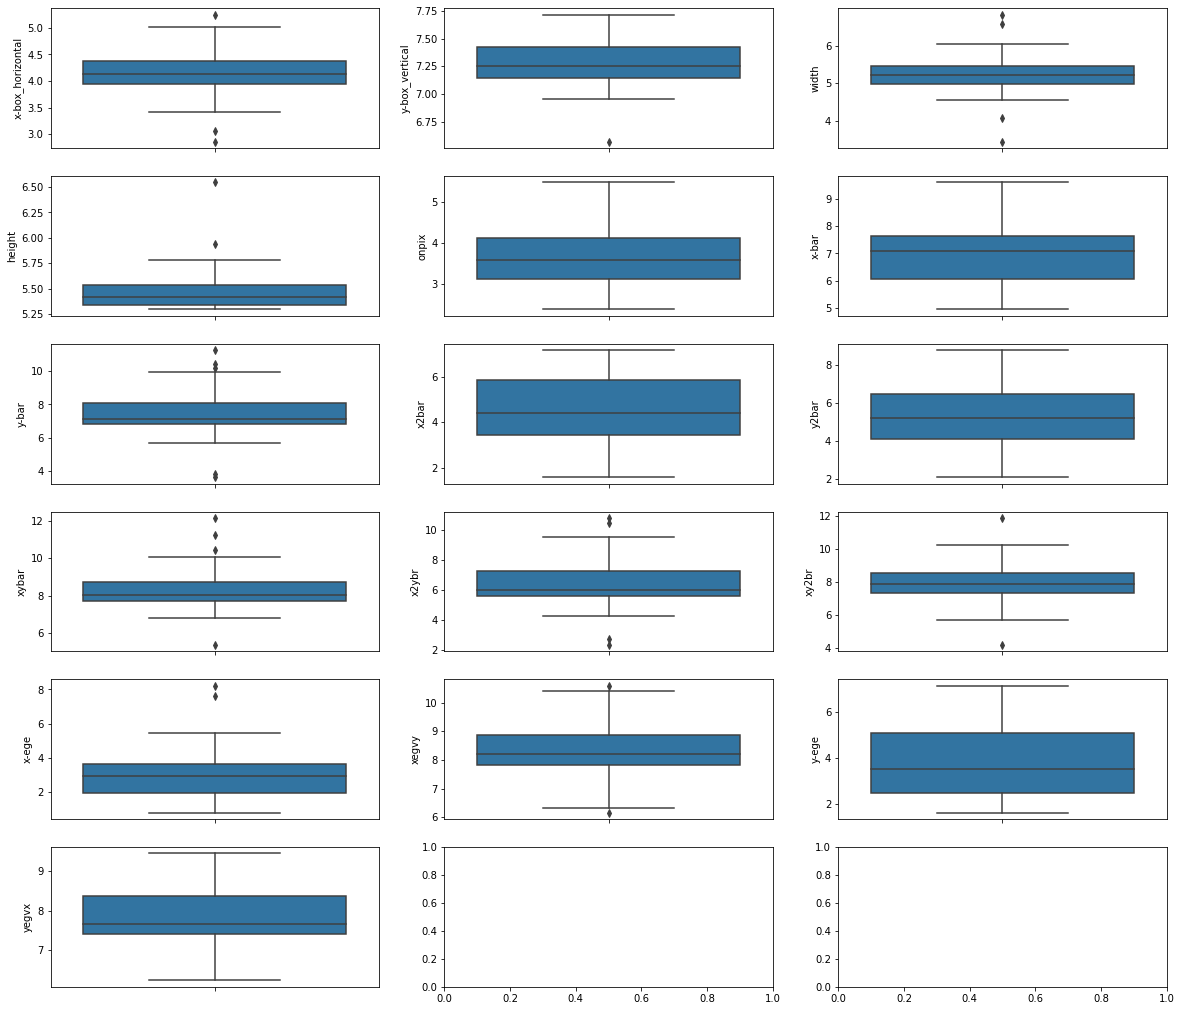

In [105]:
fig, axes = plt.subplots(6, 3, figsize=(20, 18))

for index, col in enumerate(numerical):
    sns.boxplot(ax=axes[int(np.floor(index / 3)), index % 3], data=letter_group, y=col)

In [106]:
rec_dict = {}

for col in letter_group.columns:
    q75, q25 = np.percentile(letter_group[col], [75 ,25])
    IQR = q75 - q25
    upper_whisker = q75 + 1.5 * IQR
    lower_whisker = q25 - 1.5 * IQR
    rec_dict[col] = {'upper_whisker':upper_whisker, 'lower_whisker':lower_whisker}

In [107]:
for col, value in rec_dict.items():
    data[f"{col}_cat"] = np.where(  (data[col] > value['upper_whisker']) | (data[col] < value['lower_whisker']), 1, 0 )    

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = data.iloc[:, data.columns != 'letter']
labels = data['letter']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(features, labels)

In [116]:
model = RandomForestClassifier()
model.fit(X_train ,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9628